# Import Required Libraries

Performer - Pranav Ashtankar

In [118]:
import pandas as pds
import numpy as npy
import math
import seaborn as sbn
import matplotlib.pyplot as plts
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [119]:
dataframe = pds.read_csv('tata_global.csv')
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [120]:
dataframe.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [122]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [123]:
dataframe.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [124]:
dataframe['Total Trade Quantity'].value_counts()

839802     2
3069914    1
1762110    1
3195668    1
2640664    1
          ..
1034747    1
1284440    1
1201860    1
1353097    1
658666     1
Name: Total Trade Quantity, Length: 2034, dtype: int64

In [125]:
dataframe.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [126]:
dataframe_1=dataframe.copy()

In [127]:
opening_price=list(dataframe_1['Open'].head(20))
highest_price=list(dataframe_1['High'].head(20))
lowest_price=list(dataframe_1['Low'].head(20))
last_price=list(dataframe_1['Last'].head(20))    
closing_price=list(dataframe_1['Close'].head(20))   
fig = plts.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

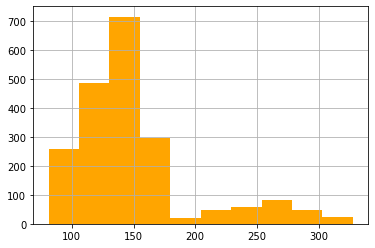

In [128]:
# histograms
dataframe_1['Open'].hist(color="orange")

<AxesSubplot:>

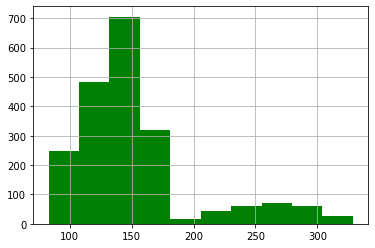

In [129]:
# histograms
dataframe_1['High'].hist(color="green")

<AxesSubplot:>

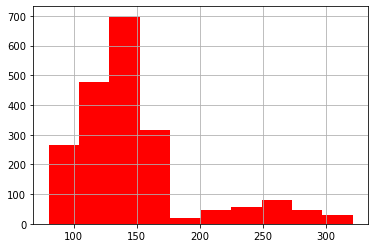

In [130]:
# histograms
dataframe_1['Low'].hist(color="red")

<AxesSubplot:>

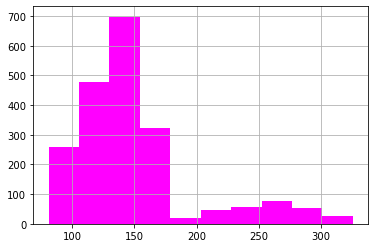

In [131]:
# histograms
dataframe_1['Close'].hist(color="magenta")

<AxesSubplot:>

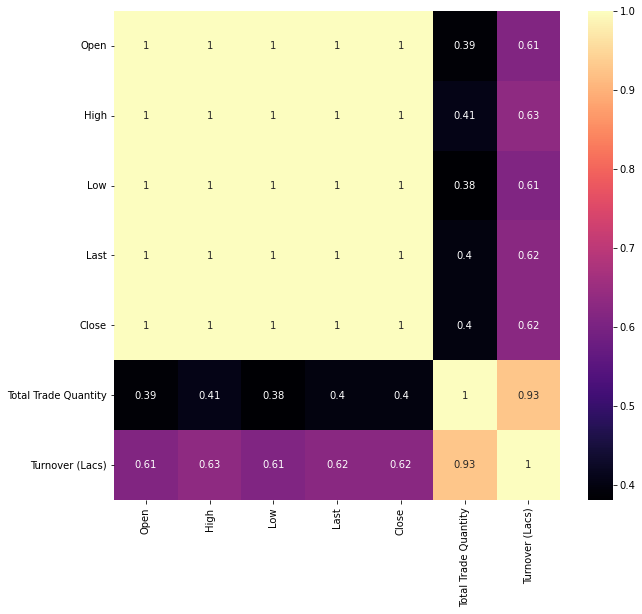

In [132]:
corr = dataframe_1.corr()
fig, ax = plts.subplots(figsize=(10,9))
sbn.heatmap(corr, annot=True, ax=ax, cmap = 'magma')

In [133]:






df_close = dataframe.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

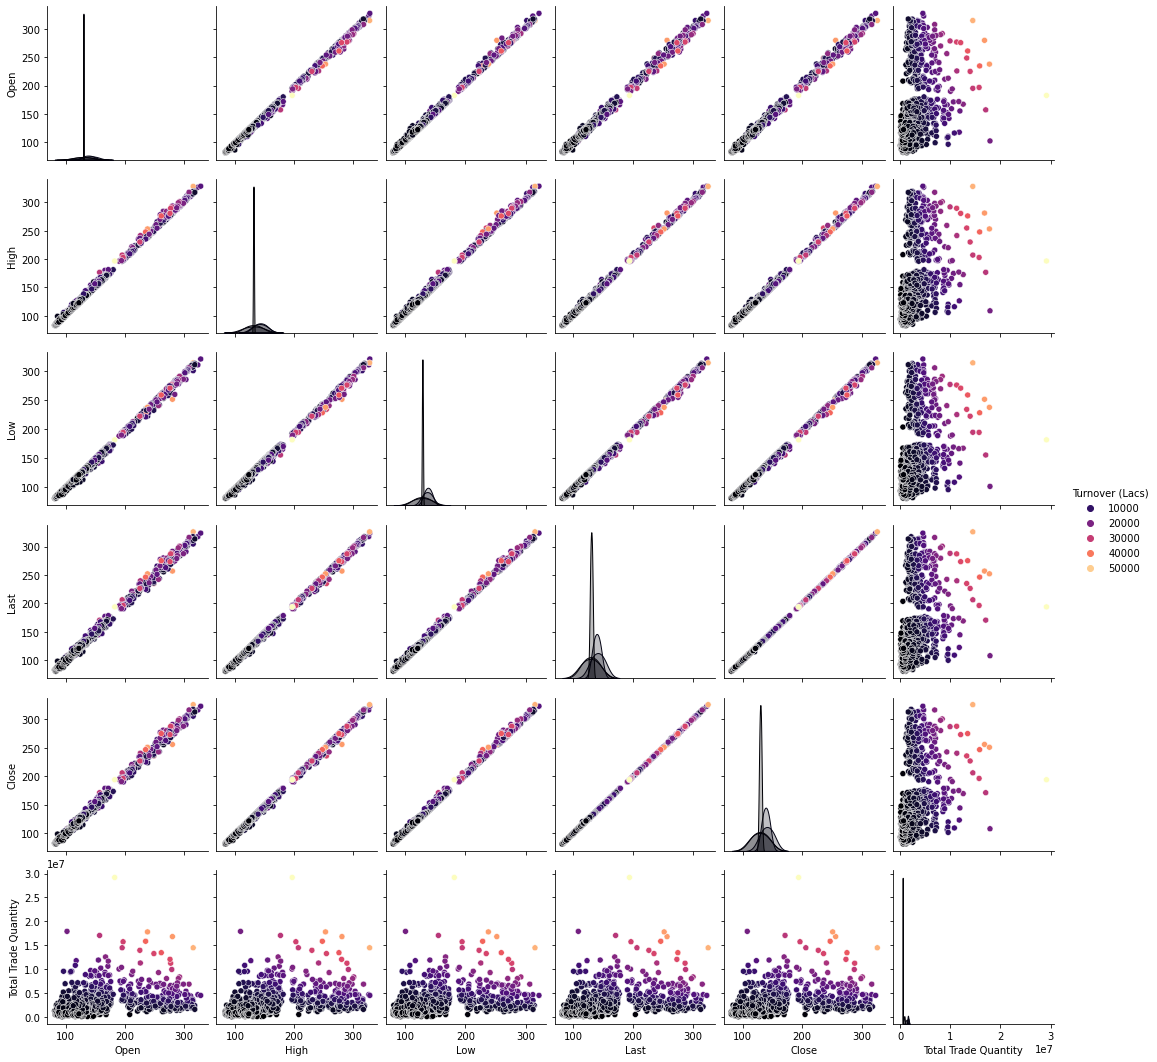

In [23]:
sbn.pairplot(dataframe, hue= 'Turnover (Lacs)', palette= "magma")
plts.show()

# Let us plot the Close value graph using pyplot

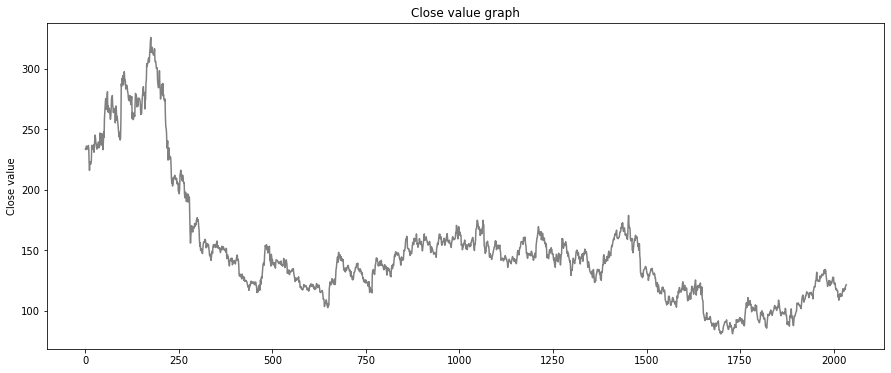

In [134]:
plts.figure(figsize=(15,6))
plts.plot(df_close, c= "grey")
plts.ylabel("Close value")
plts.title('Close value graph')
plts.show()

# Let us plot the High value graph using pyplot

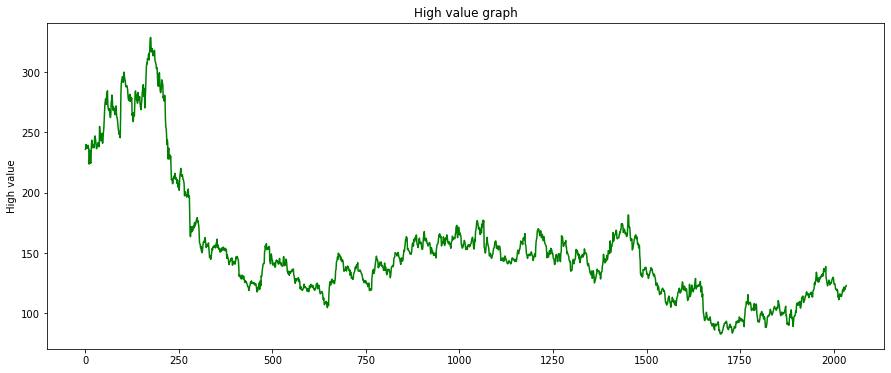

In [135]:
plts.figure(figsize=(15,6))

df_high=dataframe.reset_index()['High']
plts.plot(df_high, c="g")
plts.ylabel("High value")
plts.title('High value graph')
plts.show()

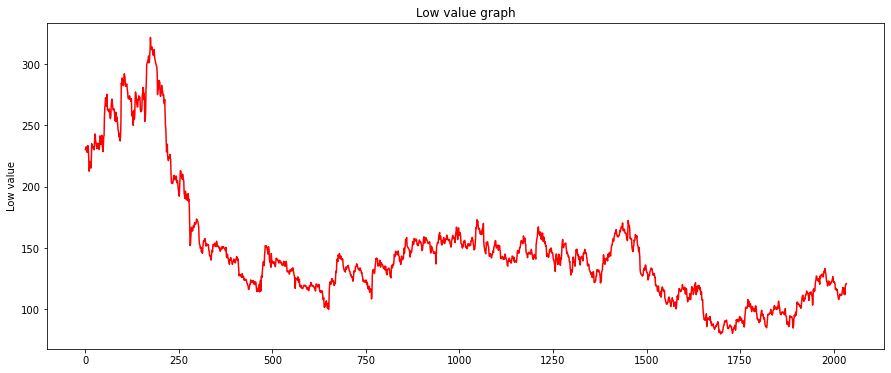

In [136]:
plts.figure(figsize=(15,6))

df_high=dataframe.reset_index()['Low']
plts.plot(df_high, c="red")
plts.ylabel("Low value")
plts.title('Low value graph')
plts.show()

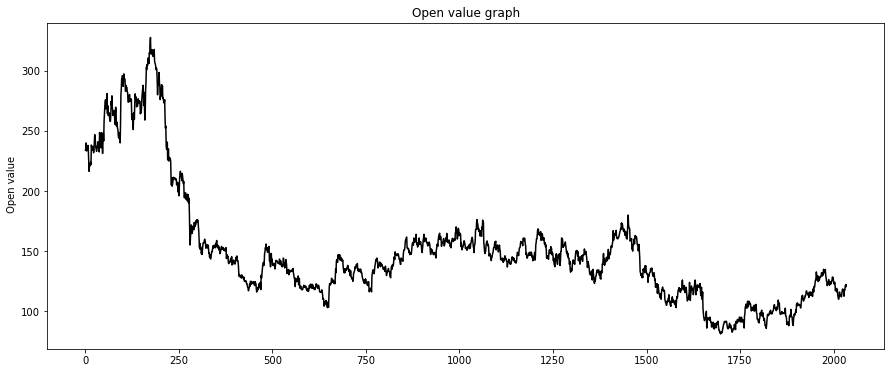

In [137]:
plts.figure(figsize=(15,6))

df_high=dataframe.reset_index()['Open']
plts.plot(df_high, c="black")
plts.ylabel(" Open value")
plts.title('Open value graph')
plts.show()

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(npy.array(df_high).reshape(-1,1))
df_high

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [34]:
df_high.shape

(2035, 1)

In [139]:
training_size = int(len(df_high) * 0.75)
test_size = len(df_high) - training_size
train_data, test_data = df_high[0:training_size,:], df_high[training_size:len(df_high)]

In [140]:
print('Training Data :',train_data.size)
print('Training Data :',test_data.size)

Training Data : 1526
Training Data : 509


In [141]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return npy.array(dataX), npy.array(dataY)

In [142]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [143]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [144]:
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [145]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [147]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [148]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [149]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [150]:
tf.__version__

'2.9.1'

In [151]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 12s 242ms/step - loss: 0.0324 - val_loss: 0.0077
Epoch 2/100
23/23 [==============================] - 5s 209ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 5s 215ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 4/100
23/23 [==============================] - 5s 211ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 5/100
23/23 [==============================] - 5s 213ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 5s 216ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/100
23/23 [==============================] - 5s 215ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 5s 217ms/step - loss: 0.0011 - val_loss: 7.9573e-04
Epoch 9/100
23/23 [==============================] - 5s 219ms/step - loss: 0.0011 - val_loss: 8.3330e-04
Epoch 10/100
23/23 [==============================] - 5s 221ms/step - loss: 0.0011

23/23 [==============================] - 5s 211ms/step - loss: 3.5121e-04 - val_loss: 2.9571e-04
Epoch 77/100
23/23 [==============================] - 5s 215ms/step - loss: 2.9754e-04 - val_loss: 2.6441e-04
Epoch 78/100
23/23 [==============================] - 5s 218ms/step - loss: 3.4722e-04 - val_loss: 2.6213e-04
Epoch 79/100
23/23 [==============================] - 5s 214ms/step - loss: 2.9545e-04 - val_loss: 2.7435e-04
Epoch 80/100
23/23 [==============================] - 5s 212ms/step - loss: 3.1154e-04 - val_loss: 3.5812e-04
Epoch 81/100
23/23 [==============================] - 5s 212ms/step - loss: 2.9974e-04 - val_loss: 2.2753e-04
Epoch 82/100
23/23 [==============================] - 5s 215ms/step - loss: 2.9765e-04 - val_loss: 2.6774e-04
Epoch 83/100
23/23 [==============================] - 5s 208ms/step - loss: 3.0705e-04 - val_loss: 2.0866e-04
Epoch 84/100
23/23 [==============================] - 5s 216ms/step - loss: 3.0210e-04 - val_loss: 3.2394e-04
Epoch 85/100
23/23 [===

In [152]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [153]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [154]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

164.06845815389354

In [155]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

106.58422314260794

In [157]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = npy.empty_like(df_high)
trainPredictPlot[:,:] = npy.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = npy.empty_like(df_high)
testPredictPlot[:,:] = npy.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_high) - 1, :] = test_predict

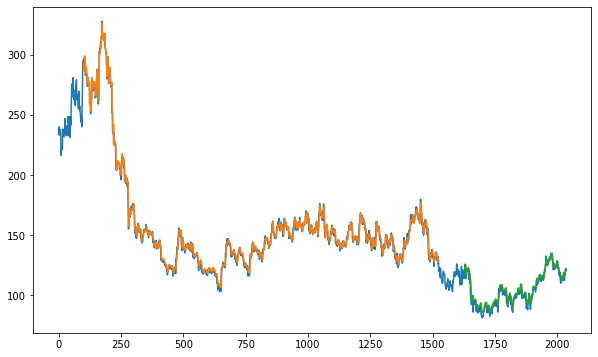

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [158]:
#Plot baseline and predictions
plts.figure(figsize=(10,6))

plts.plot(scaler.inverse_transform(df_high))
plts.plot(trainPredictPlot)
plts.plot(testPredictPlot)
plts.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [159]:
#Predict the next 28 days Stock Price
print("Length of Test Data : ",len(test_data))
print("Shape of x Test Data :",x_test.shape)

Length of Test Data :  509
Shape of x Test Data : (408, 100, 1)


In [164]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [165]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [167]:

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=npy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995 0.14557989 0.151

9 day output [[0.18218605]]
10 day input [0.15004055 0.14193025 0.16017843 0.15693431 0.16504461 0.1770073
 0.18146796 0.18815896 0.20924574 0.19424169 0.18106245 0.18207624
 0.1960665  0.17680454 0.18207624 0.18004866 0.18207624 0.18876723
 0.19383617 0.19099757 0.19505272 0.19809408 0.20640714 0.19748581
 0.19525547 0.20437956 0.19870235 0.21796431 0.21553122 0.20600162
 0.21654501 0.21654501 0.2175588  0.19870235 0.19018654 0.17802109
 0.175588   0.16301703 0.16707218 0.17112733 0.17639903 0.18349554
 0.1717356  0.16423358 0.16991079 0.17619627 0.16788321 0.16909976
 0.17396594 0.17741281 0.18268451 0.19221411 0.18896999 0.19018654
 0.17396594 0.17092457 0.16788321 0.17477697 0.16443633 0.14557989
 0.15287916 0.15369019 0.15044607 0.14152474 0.15145985 0.13341444
 0.12530414 0.11719384 0.11780211 0.12489862 0.14132198 0.13098135
 0.12935929 0.13240065 0.12895377 0.12530414 0.13381995 0.14557989
 0.15166261 0.15085158 0.14679643 0.14355231 0.12733171 0.14963504
 0.14801298 0.15815085

18 day output [[0.19400766]]
19 day input [0.19424169 0.18106245 0.18207624 0.1960665  0.17680454 0.18207624
 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757 0.19505272
 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956 0.19870235
 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501 0.2175588
 0.19870235 0.19018654 0.17802109 0.175588   0.16301703 0.16707218
 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358 0.16991079
 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281 0.18268451
 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457 0.16788321
 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019 0.15044607
 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384 0.11780211
 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065 0.12895377
 0.12530414 0.13381995 0.14557989 0.15166261 0.15085158 0.14679643
 0.14355231 0.12733171 0.14963504 0.14801298 0.15815085 0.16504461
 0.15896188 0.16626115 0.16728178 0.16937596 0.1710735  0.17258316
 0.17399622 0.1753618

26 day output [[0.20284678]]
27 day input [0.18876723 0.19383617 0.19099757 0.19505272 0.19809408 0.20640714
 0.19748581 0.19525547 0.20437956 0.19870235 0.21796431 0.21553122
 0.20600162 0.21654501 0.21654501 0.2175588  0.19870235 0.19018654
 0.17802109 0.175588   0.16301703 0.16707218 0.17112733 0.17639903
 0.18349554 0.1717356  0.16423358 0.16991079 0.17619627 0.16788321
 0.16909976 0.17396594 0.17741281 0.18268451 0.19221411 0.18896999
 0.19018654 0.17396594 0.17092457 0.16788321 0.17477697 0.16443633
 0.14557989 0.15287916 0.15369019 0.15044607 0.14152474 0.15145985
 0.13341444 0.12530414 0.11719384 0.11780211 0.12489862 0.14132198
 0.13098135 0.12935929 0.13240065 0.12895377 0.12530414 0.13381995
 0.14557989 0.15166261 0.15085158 0.14679643 0.14355231 0.12733171
 0.14963504 0.14801298 0.15815085 0.16504461 0.15896188 0.16626115
 0.16728178 0.16937596 0.1710735  0.17258316 0.17399622 0.1753618
 0.17671095 0.17806257 0.1794256  0.18080139 0.18218605 0.18357284
 0.18495396 0.1863218

In [175]:
day_new = npy.arange(1,101)
day_pred = npy.arange(101,129)

In [176]:
print(day_new.shape)
print(day_pred.shape)

(100,)
(28,)


In [177]:
ds3 = df_high.tolist()


In [178]:
ds3.extend(lst_output)

len(df_high)

2035

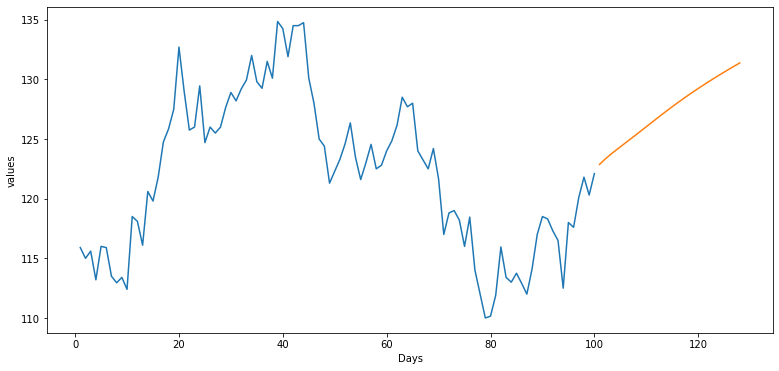

In [179]:
plts.figure(figsize=(13,6))

plts.plot(day_new, scaler.inverse_transform(df_high[1935:]))
plts.plot(day_pred, scaler.inverse_transform(lst_output))
plts.xlabel('Days')
plts.ylabel('values')

plts.show()

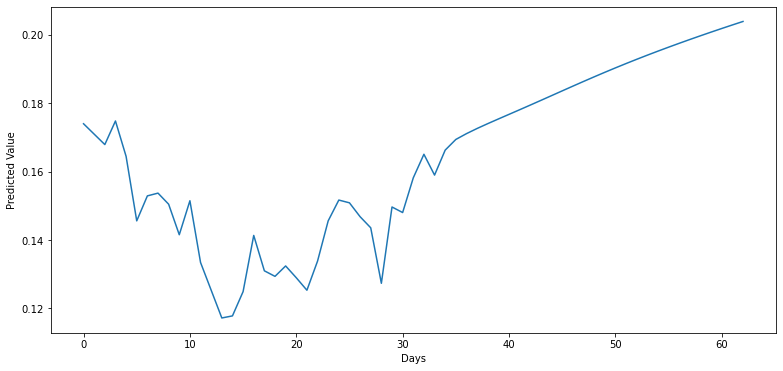

In [181]:
plts.figure(figsize=(13,6))

ds3=df_high.tolist()
ds3.extend(lst_output)
plts.plot(ds3[2000:])
plts.xlabel("Days")
plts.ylabel("Predicted Value")
plts.show()

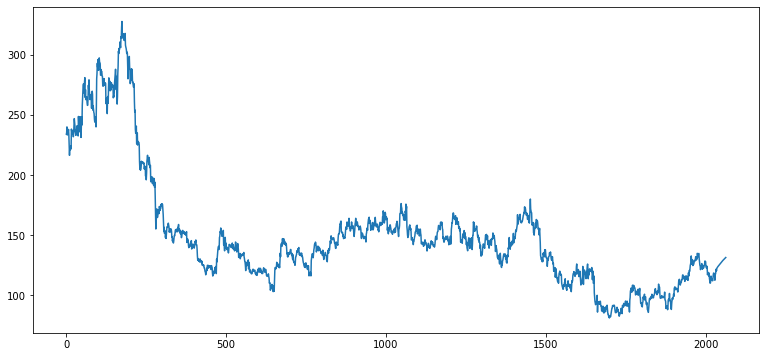

In [183]:
plts.figure(figsize=(13,6))

ds3=scaler.inverse_transform(ds3).tolist()
plts.plot(ds3)

plts.show()